# EDA

##### Se explora, analiza y procesan los datos para comprender la problemática y posteriormente realizar el modelado. 

In [275]:
# Se importan las librerías a utilizar:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [276]:
#  Se ajustan algunas opciones de visualización de pandas para cambiar la forma en que se muestran los datos.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [277]:
# Se importa el dataset
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

## Limpieza y procesamiento general

In [278]:
# Se observan los tipos de datos
wec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


In [279]:
# Se observan las 5 primeras filas del dataset
wec.head(5)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508

In [280]:
wec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


In [281]:
# Se verifica que no hayan filas duplicadas.
wec.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17427    False
17428    False
17429    False
17430    False
17431    False
Length: 17432, dtype: bool

In [282]:
# Se consultan valores faltantes en la columna iso_code
valores_nulos1 = wec['iso_code'].isnull().any()
if valores_nulos1:
    print("Hay filas sin valor en la columna 'iso_code'.")
else:
    print("Todas las filas tienen un valor en la columna 'iso_code'.")

Hay filas sin valor en la columna 'iso_code'.


##### Se descartan las filas correspondientes a regiones y continentes, así como a países actualmente inexistentes (Yugoslavia, Checoslovaquia etc.) <br>
##### Por exploración previa del dataset se sabe que las regiones, continentes y países inexistentes poseen iso_code nulo, ya que no cuentan con código ISO. Por lo tanto, este criterio será el primer filtro para el tratamiento de los valores nulos. 

In [283]:
# Se filtan las filas del DataFrame, donde el valor en la columna "iso_code" no es nulo.
wec = wec[~wec["iso_code"].isnull()]
wec = wec[~(wec["country"] == "World")]

##### Se modifican las unidades de la columna "gdp" (PBI) para que esté en miles de millones de dólares y "population" (población) para que quede en millones de personas, para facilitar la dimensión de la unidad:

In [284]:
# Se escalan las columnas
wec["gdp"] = wec["gdp"]/10**9
wec["population"] = wec["population"]/10**6

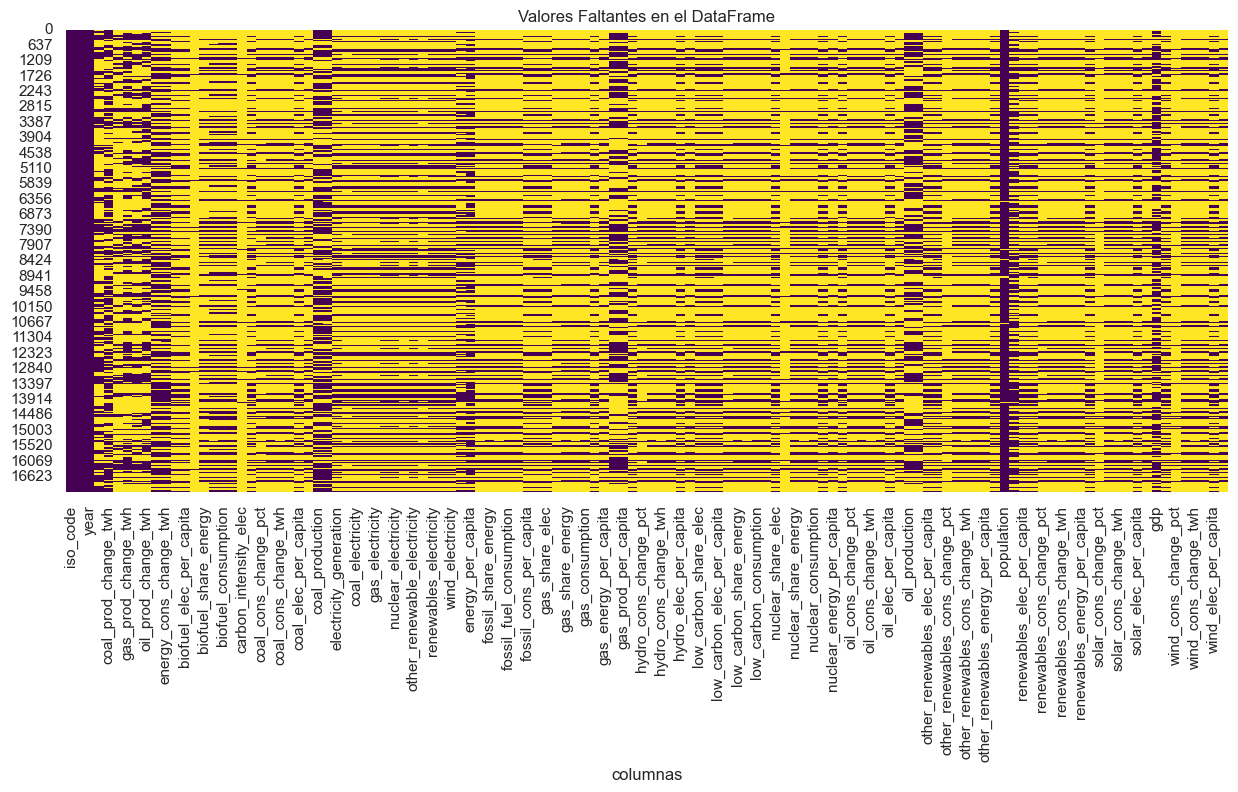

In [285]:
# Se visualizan de valores faltantes
plt.figure(figsize=(15, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('columnas')
plt.show()

##### Se observa que el dataset posee gran cantidad de valores nulos. Y se planterá la metodología para la imputación de datos. 

## Se asigna continente a cada país

In [286]:
# Se realiza un mapeo entre códigos ISO y continentes.
iso_to_continent = {
    'DZA': 'África', 'AGO': 'África', 'BEN': 'África', 'BWA': 'África', 'BFA': 'África', 'BDI': 'África', 'CMR': 'África', 'CPV': 'África', 'CAF': 'África', 'TCD': 'África', 'COM': 'África', 'COD': 'África', 'DJI': 'África', 'EGY': 'África', 'GNQ': 'África', 'ERI': 'África', 'ETH': 'África', 'GAB': 'África', 'GMB': 'África', 'GHA': 'África', 'GIN': 'África', 'GNB': 'África', 'CIV': 'África', 'KEN': 'África', 'LSO': 'África', 'LBR': 'África', 'LBY': 'África', 'MDG': 'África', 'MWI': 'África', 'MLI': 'África', 'MRT': 'África', 'MUS': 'África', 'MYT': 'África', 'MAR': 'África', 'MOZ': 'África', 'NAM': 'África', 'NER': 'África', 'NGA': 'África', 'COG': 'África', 'REU': 'África', 'RWA': 'África', 'SHN': 'África', 'STP': 'África', 'SEN': 'África', 'SYC': 'África', 'SLE': 'África', 'SOM': 'África', 'ZAF': 'África', 'SSD': 'África', 'SDN': 'África', 'SWZ': 'África', 'TZA': 'África', 'TGO': 'África', 'TUN': 'África', 'UGA': 'África', 'ESH': 'África', 'ZMB': 'África', 'ZWE': 'África',
    'AFG': 'Asia', 'ARM': 'Asia', 'AZE': 'Asia', 'BHR': 'Asia', 'BGD': 'Asia', 'BTN': 'Asia', 'IOT': 'Asia', 'BRN': 'Asia', 'KHM': 'Asia', 'CHN': 'Asia', 'CCK': 'Asia', 'GEO': 'Asia', 'HKG': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'IRN': 'Asia', 'IRQ': 'Asia', 'ISR': 'Asia', 'JPN': 'Asia', 'JOR': 'Asia', 'KAZ': 'Asia', 'KWT': 'Asia', 'KGZ': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'MAC': 'Asia', 'MYS': 'Asia', 'MDV': 'Asia', 'MNG': 'Asia', 'MMR': 'Asia', 'NPL': 'Asia', 'PRK': 'Asia', 'OMN': 'Asia', 'PAK': 'Asia', 'PSE': 'Asia', 'PHL': 'Asia', 'QAT': 'Asia', 'SAU': 'Asia', 'SGP': 'Asia', 'KOR': 'Asia', 'LKA': 'Asia', 'SYR': 'Asia', 'TWN': 'Asia', 'TJK': 'Asia', 'THA': 'Asia', 'TUR': 'Asia', 'TKM': 'Asia', 'ARE': 'Asia', 'UZB': 'Asia', 'VNM': 'Asia', 'YEM': 'Asia',
    'ALA': 'Europa', 'ALB': 'Europa', 'AND': 'Europa', 'AUT': 'Europa', 'BLR': 'Europa', 'BEL': 'Europa', 'BIH': 'Europa', 'BGR': 'Europa', 'HRV': 'Europa', 'CYP': 'Europa', 'CZE': 'Europa', 'DNK': 'Europa', 'EST': 'Europa', 'FRO': 'Europa', 'FIN': 'Europa', 'FRA': 'Europa', 'DEU': 'Europa', 'GIB': 'Europa', 'GRC': 'Europa', 'GGY': 'Europa', 'HUN': 'Europa', 'ISL': 'Europa', 'IRL': 'Europa', 'IMN': 'Europa', 'ITA': 'Europa', 'JEY': 'Europa', 'XKX': 'Europa', 'LVA': 'Europa', 'LIE': 'Europa', 'LTU': 'Europa', 'LUX': 'Europa', 'MKD': 'Europa', 'MLT': 'Europa', 'MDA': 'Europa', 'MCO': 'Europa', 'MNE': 'Europa', 'NLD': 'Europa', 'NOR': 'Europa', 'OWID_KOS': 'Europa', 'POL': 'Europa', 'PRT': 'Europa', 'ROU': 'Europa', 'RUS': 'Europa', 'SMR': 'Europa', 'SRB': 'Europa', 'SCG': 'Europa', 'SVK': 'Europa', 'SVN': 'Europa', 'ESP': 'Europa', 'SJM': 'Europa', 'SWE': 'Europa', 'CHE': 'Europa', 'UKR': 'Europa', 'GBR': 'Europa', 'VAT': 'Europa',
    'AIA': 'Norteamérica', 'ATG': 'Norteamérica', 'ABW': 'Norteamérica', 'BRB': 'Norteamérica', 'BLZ': 'Norteamérica', 'BMU': 'Norteamérica', 'BES': 'Norteamérica', 'VGB': 'Norteamérica', 'CAN': 'Norteamérica', 'CYM': 'Norteamérica', 'CRI': 'Norteamérica', 'CUB': 'Norteamérica', 'CUW': 'Norteamérica', 'DMA': 'Norteamérica', 'DOM': 'Norteamérica', 'SLV': 'Norteamérica', 'GRL': 'Norteamérica', 'GRD': 'Norteamérica', 'GLP': 'Norteamérica', 'GTM': 'Norteamérica', 'HTI': 'Norteamérica', 'HND': 'Norteamérica', 'JAM': 'Norteamérica', 'MTQ': 'Norteamérica', 'MEX': 'Norteamérica', 'MSR': 'Norteamérica', 'ANT': 'Norteamérica', 'NIC': 'Norteamérica', 'PAN': 'Norteamérica', 'PRI': 'Norteamérica', 'BLM': 'Norteamérica', 'KNA': 'Norteamérica', 'LCA': 'Norteamérica', 'MAF': 'Norteamérica', 'SPM': 'Norteamérica', 'VCT': 'Norteamérica', 'SXM': 'Norteamérica', 'BHS': 'Norteamérica', 'TTO': 'Sudamérica', 'TCA': 'Norteamérica', 'USA': 'Norteamérica', 'VIR': 'Norteamérica',
    'ARG': 'Sudamérica', 'BOL': 'Sudamérica', 'BRA': 'Sudamérica', 'CHL': 'Sudamérica', 'COL': 'Sudamérica', 'ECU': 'Sudamérica', 'FLK': 'Sudamérica', 'GUF': 'Sudamérica', 'GUY': 'Sudamérica', 'PRY': 'Sudamérica', 'PER': 'Sudamérica', 'SUR': 'Sudamérica', 'URY': 'Sudamérica', 'VEN': 'Sudamérica',
    'ASM': 'Oceanía', 'AUS': 'Oceanía', 'CXR': 'Oceanía', 'COK': 'Oceanía', 'FJI': 'Oceanía', 'PYF': 'Oceanía', 'GUM': 'Oceanía', 'KIR': 'Oceanía', 'MHL': 'Oceanía', 'FSM': 'Oceanía', 'NRU': 'Oceanía', 'NCL': 'Oceanía', 'NZL': 'Oceanía', 'NIU': 'Oceanía', 'NFK': 'Oceanía', 'MNP': 'Oceanía', 'PLW': 'Oceanía', 'PNG': 'Oceanía', 'PCN': 'Oceanía', 'WSM': 'Oceanía', 'SLB': 'Oceanía', 'TLS': 'Oceanía', 'TKL': 'Oceanía', 'TON': 'Oceanía', 'TUV': 'Oceanía', 'VUT': 'Oceanía', 'WLF': 'Oceanía'
}

In [287]:
wec['continente'] = wec['iso_code'].map(iso_to_continent)

In [288]:
# Se verifica que no quedaron filas sin continente asignado.
wec['continente'].isnull().sum()

0

In [289]:
# Se observan cuántos valores faltantes tiene cada columna del dataframe: (ordenados de mayor a menor), de acuerdo a la columna 
missing_values = wec.isnull().sum().sort_values(ascending = False) 
missing_values

biofuel_cons_change_pct                    15088
carbon_intensity_elec                      14921
solar_cons_change_pct                      14309
nuclear_cons_change_pct                    14184
wind_cons_change_pct                       14110
other_renewables_cons_change_pct           13393
hydro_cons_change_pct                      12061
gas_cons_change_pct                        12021
coal_cons_change_pct                       11963
renewables_cons_change_pct                 11897
low_carbon_cons_change_pct                 11890
fossil_cons_change_pct                     11524
oil_cons_change_twh                        11524
oil_cons_change_pct                        11524
fossil_cons_change_twh                     11524
nuclear_cons_change_twh                    11518
low_carbon_cons_change_twh                 11518
coal_cons_change_twh                       11518
wind_cons_change_twh                       11518
gas_cons_change_twh                        11518
other_renewables_con

## Características del dataset

In [290]:
# Se consultan las estadísticas de los valores numéricos.
wec.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,15509.000000,6403.000000,9314.00000,4.027000e+03,6934.000000,5517.000000,7522.000000,8596.00000,8646.000000,4165.000000,4148.000000,421.000000,4064.000000,5227.000000,5341.000000,5341.000000,588.000000,4615.000000,3546.000000,4064.000000,3991.000000,4070.000000,4598.000000,4070.000000,9527.000000,9400.000000,5398.000000,4208.000000,4658.000000,4658.000000,4658.000000,5398.000000,5398.000000,4658.000000,5398.000000,4208.000000,5398.000000,5398.000000,5398.000000,6835.000000,8.778000e+03,3985.000000,4064.000000,3985.000000,4064.000000,4064.000000,4598.000000,4615.000000,4615.000000,3488.000000,4064.000000,3991.000000,4070.000000,4598.000000,4070.000000,7089.000000,7080.000000,5355.000000,3448.000000,4064.000000,3991.000000,4070.000000,5338.000000,4070.000000,5355.000000,5398.000000,5338.000000,3619.000000,4064.000000,3991.000000,4070.000000,4070.000000,5355.000000,1325.000000,4064.000000,3991.000000,4070.000000,5338.000000,4070.000000,4615.000000,3985.000000,4064.000000,3985.000000,4064.000000,4598.000000,4064.000000,7653.000000,7.644000e+03,5338.000000,5355.000000,2116.000000,4064.000000,3991.000000,4070.000000,4070.000000,5338.000000,15291.000000,8861.000000,5338.000000,5355.000000,3612.000000,4064.000000,3991.000000,4070.000000,4070.000000,5355.000000,1200.000000,4064.000000,3991.000000,4070.000000,5338.000000,4070.000000,10297.000000,5355.000000,1399.00000,4064.000000,3991.000000,4070.000000,5338.00000

In [291]:
# Se verifica la cantidad de columnas y filas correspondientes a los países.
forma = wec.shape
paises = len(wec["country"].unique())
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas correspondientes a {paises} paises."

'El dataset tiene 15509 filas y 123 columnas correspondientes a 215 paises.'

In [292]:
# Se consultan los nombres de las columnas
print(wec.columns)

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_energy_per_capita', 'gdp', 'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy', 'wind_cons_change_twh', 'wind_consumption',
       'wind_elec_per_capita', 'wind_energy_per_capita', 'continente'],
      dtype='object', length=123)


### Se detectan outliers

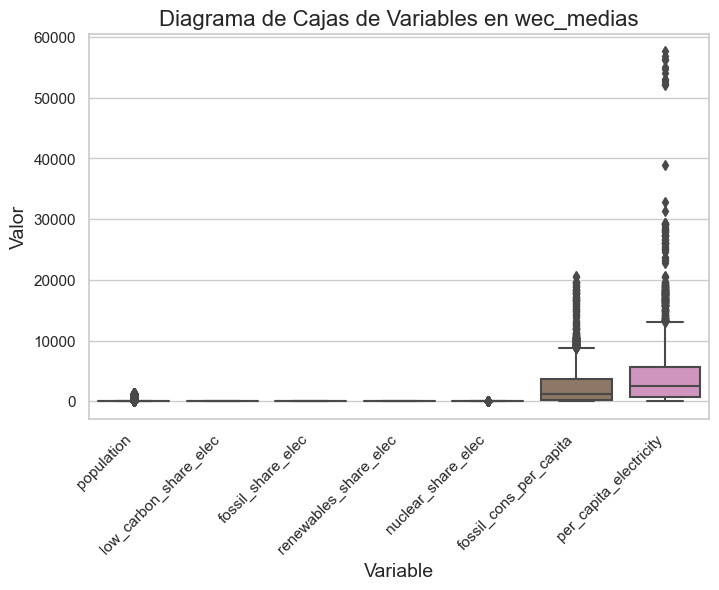

In [293]:
# Se grafica la distribución de datos
columnas_numericas = ['population', 'low_carbon_share_elec', 'fossil_share_elec', 'renewables_share_elec', 'nuclear_share_elec', 'fossil_cons_per_capita', 'per_capita_electricity']
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
colors = px.colors.qualitative.Set2
ax = sns.boxplot(data=wec[columnas_numericas])
ax.set_title('Diagrama de Cajas de Variables en wec_medias', fontsize=16)
ax.set_ylabel('Valor', fontsize=14)
ax.set_xlabel('Variable', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Se observan outliers en las columnas: electricidad per cápita

## Dependencia de combustibles fósiles y transición energética
###  ¿De qué fuentes proviene la electricidad que consume cada país?

In [294]:
# Se seleccionan las columnas de interés.
wec_ns = wec[["country", 'year', "population", "fossil_cons_per_capita", "per_capita_electricity", "low_carbon_share_elec", "fossil_share_elec", 
"renewables_share_elec", "nuclear_share_elec", "continente", "iso_code"]]

In [295]:
# Se consultan los valores nulos por año
valores_nulos_por_anio= wec_ns.groupby('year').apply(lambda x: x.isnull().sum().sum()).reset_index()
valores_nulos_por_anio.columns = ['year', 'cantidad_total_de_nulos']

In [296]:
# Se grafican los valores nulos por año
fig = go.Figure()
fig.add_trace(go.Bar(x=valores_nulos_por_anio['year'], y=valores_nulos_por_anio['cantidad_total_de_nulos']))
fig.update_layout(xaxis_title='Año', yaxis_title='Cantidad Total de Nulos', title='Cantidad Total de Valores Nulos por Año', height=500,width=1000)
fig.show()

Se observa gran cantidad de valores nulos en los primeros años. Recién después del año 2000 disminuyen.

##### Se filtra por "year" para contemplar la última década: 

In [297]:
# Se incluyen los años mayores a 2010 de la columna year.
wec_ns = wec_ns[(wec_ns['year'] > 2010)]

##### Dado, que se verifica que gran cantidad de valores nulos proviene de años anteriores al 2010, se utilizará como segundo criterio para la imputación de valores nulos, el análisis desde el 2010 al 2022, es decir 10 años, para preservar la mayor cantidad de filas, es decir preservar todos los países. 

In [298]:
#Se muestran los años comprendidos en el análisis
unique_years = wec_ns['year'].unique()
print("Años comprendidos en el análisis:", sorted(unique_years))

Años comprendidos en el análisis: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


##### Se calculan las medias y  se arma otro dataset.

In [299]:
# Contar la cantidad de valores nulos por columna
valores_nulos_por_columna = wec.isnull().sum().reset_index()
valores_nulos_por_columna.columns = ['columna', 'cantidad_de_nulos']
# Mostrar el DataFrame resultante
print(valores_nulos_por_columna)

                                     columna  cantidad_de_nulos
0                                   iso_code                  0
1                                    country                  0
2                                       year                  0
3                       coal_prod_change_pct               9106
4                       coal_prod_change_twh               6195
5                        gas_prod_change_pct              11482
6                        gas_prod_change_twh               8575
7                        oil_prod_change_pct               9992
8                        oil_prod_change_twh               7987
9                     energy_cons_change_pct               6913
10                    energy_cons_change_twh               6863
11                        biofuel_share_elec              11344
12                   biofuel_elec_per_capita              11361
13                   biofuel_cons_change_pct              15088
14                      biofuel_share_en

##### Se decide usar los valores medios de los últimos 10 años para evitar distorsión en los datos por aumentos o disminuciones en años puntuales. 

In [300]:
# Se calculan las medias según el país
wec_medias = wec_ns.groupby('country').agg({
    'population': 'mean',
    'low_carbon_share_elec' : 'mean', 
    "fossil_share_elec": "mean",
    "renewables_share_elec": "mean",
    "nuclear_share_elec": "mean",
    "fossil_cons_per_capita" : 'mean', 
    "per_capita_electricity" : 'mean',
    'continente': 'first',
    'iso_code': 'first'
}).reset_index()

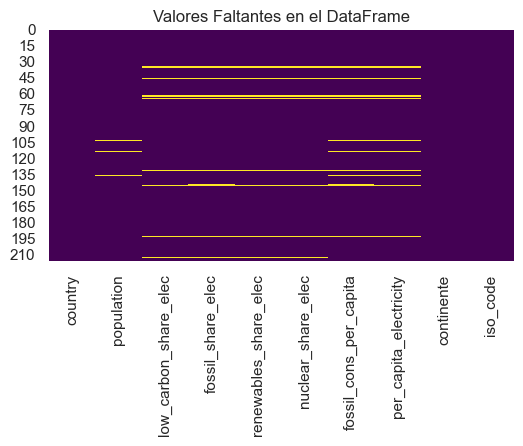

In [301]:
# visualización de valores faltantes
plt.figure(figsize=(6,3))
sns.heatmap(wec_medias.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

##### Finalmente se realiza la imputación final de los nulos eliminándolo, ya que no hay datos de los últimos 10 años para esos países. 

In [302]:
# Se eliminan las filas de acuerdo al criterio establecido. 
wec_medias.dropna(axis = 0, how = 'any', inplace = True)

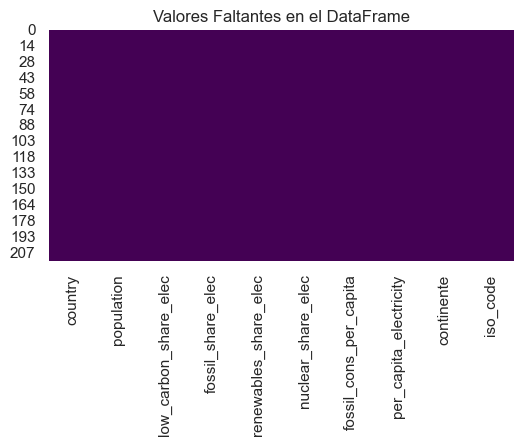

In [303]:
# Se verifica que no hayan valores faltantes a través de un gráfico
plt.figure(figsize=(6, 3))
sns.heatmap(wec_medias.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

##### ¿De cuántos países se tienen datos?

In [304]:
print(f"Cantidad de países de los que se tienen datos:")
len(wec_medias["country"].unique())

Cantidad de países de los que se tienen datos:


203

##### ¿cuáles son los países?

In [305]:
# Se obtienen los valores únicos de la columna country para determinar los países con los que se trabajará
wec_medias['country'].unique()   

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon',
       'Gambia', 'Georgia', 'Germany'

In [306]:
# Se observan las primeras filas
wec_medias.head(5)

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,continente,iso_code
0,Afghanistan,34.247333,83.543444,16.456556,83.543444,0.0,5.156111,31.813000,Asia,AFG
1,Albania,2.896444,99.851444,0.148556,99.851444,0.0,2.103889,1998.432000,Europa,ALB
2,Algeria,39.784222,0.766333,99.233667,0.766333,0.0,1568.103333,1580.157222,África,DZA
3,American Samoa,0.055778,0.000000,100.000000,0.000000,0.0,2888.744333,2888.744333,Oceanía,ASM
4,Angola,27.940556,65.673556,34.326444,65.673556,0.0,110.650000,326.007889,África,AGO


### ¿cuál es la fuente de generación de eléctricidad más utilizada a nivel mundial?

In [307]:
# Se calcula la suma total de las tres columnas
total_fossil_share = wec_medias['fossil_share_elec'].sum()
total_renewables_share = wec_medias['renewables_share_elec'].sum()
total_nuclear_share = wec_medias['nuclear_share_elec'].sum()

# Se crea un DataFrame con los totales
totals_df = pd.DataFrame({'Source': ['Fossil', 'Renewables','Nuclear'],'Total Share': [total_fossil_share, total_renewables_share, total_nuclear_share]})

# Se grafica 
fig = px.pie(totals_df,names='Source',values='Total Share',title='Fuentes de electricidad en el mundo',)
plt.figure(figsize=(6, 3))
# Se muestra el gráfico
fig.show()

<Figure size 600x300 with 0 Axes>

Como se suponía, se puede confirmar que la mayoría de los países del mundo utilizan a la fuente fósil para la generación de electricidad. Pero no conocemos en detalle lo que sucede con cada país, y si hay países que utilizan los tre tipos de fuentes.

# ¿Comó es el perfil energético para electricidad en cada país?

In [308]:
# Se ordena segun el porcentaje fosil
wec_mundo = wec_medias.sort_values('fossil_share_elec', ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(x=wec_mundo['country'], y=wec_mundo['fossil_share_elec'], name='Fossil'))
fig.add_trace(go.Bar(x=wec_mundo['country'], y=wec_mundo['nuclear_share_elec'], name='Nuclear'))
fig.add_trace(go.Bar(x=wec_mundo['country'], y=wec_mundo['renewables_share_elec'], name='Renewables'))
fig.update_layout(barmode='stack',xaxis_title='Países',yaxis_title='Porcentaje',title='Porcentaje de fuente en electricidad por país',height=700, width=1200,)
fig.show()

El gráfico muestra el porcentaje de fuente (renovable, nuclear y fósil de cada país). 
Se puede apreciar que los países más cercanos a la ordenada al origen cuentan con mayor dependencia de fuentes fósiles y a medida que se alejan, crece el porcentaje de fuentes renovables. Es importante destacar que la mayoría de los países del mundo depende en mayor proporción de combustibles fósiles para el abastecimiento de electricidad, pero hay países que se encuentran en la transición, que posteriormente se determinará en que grupo se encuentran. 

### ¿Comó son los perfiles en Sudamérica?

In [309]:
# Se filtran los datos para incluir solo países de Sudamérica y ordenamos segun porcentaje fósil
wec_suram = wec_medias[wec_medias['continente'] == 'Sudamérica']
wec_suram = wec_suram.sort_values('fossil_share_elec', ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(x=wec_suram['country'], y=wec_suram['fossil_share_elec'], name='Fossil'))
fig.add_trace(go.Bar(x=wec_suram['country'], y=wec_suram['nuclear_share_elec'], name='Nuclear'))
fig.add_trace(go.Bar(x=wec_suram['country'], y=wec_suram['renewables_share_elec'], name='Renewables'))
fig.update_layout(barmode='stack', xaxis_title='Países',yaxis_title='Porcentaje',title='Porcentaje de fuente en electricidad por país en Sudamérica',)
fig.show()

En Sudamérica se mantiene la tendencia mundial de alta dependencia de combustibles fósiles. Se destaca la presencia de electricidad de fuente nuclear en Argentina y Brasil. 

In [310]:
# Se filtran los datos para incluir solo países de Sudamérica y ordenamos según porcentaje fósil
wec_suram = wec_medias[wec_medias['continente'] == 'Sudamérica']
wec_suram = wec_suram.sort_values('fossil_share_elec', ascending=False)
valor_limite = 206 
wec_suram_filtrado = wec_suram[wec_suram['population'] < valor_limite]
wec_suram_filtrado = wec_suram_filtrado[(wec_suram_filtrado['population'] < 50) | (wec_suram_filtrado['population'] > 200)]
fig = go.Figure()

# Añade barras apiladas para cada fuente de energía con barras más anchas
fig.add_trace(go.Bar(x=wec_suram_filtrado['population'], y=wec_suram_filtrado['fossil_share_elec'], name='Fossil', width=2,))  # Agrega el nombre del país al texto

fig.add_trace(go.Bar(x=wec_suram_filtrado['population'], y=wec_suram_filtrado['nuclear_share_elec'], name='Nuclear', width=2,))  # Agrega el nombre del país al texto

fig.add_trace(go.Bar(x=wec_suram_filtrado['population'], y=wec_suram_filtrado['renewables_share_elec'], name='Renewables', width=2,text=wec_suram_filtrado['country']))  # Agrega el nombre del país al texto

# Especifica el diseño del gráfico
fig.update_layout( barmode='stack',xaxis_title='Población (miles de millones)',  yaxis_title='Porcentaje', title='Porcentaje de fuente en electricidad por población de cada país en Sudamérica',height=600, width=4500,)

# Muestra el gráfico
fig.show()

Se observa que la cantidad de población por país, en sudamérica no es una variables que influya en el poncentaje de emisión de electricidad producido por fuentes fósiles, renovables ni nuclear.  Posteriormente se realizará un análisis con otras variables. 

A partir de estos datos realizaremos un analisis de clustering por DBSCAN con el objetivo de agrupar a los países según las fuentes de las que obtienen su electricidad. 
Para continuar con la lectura edl modelo supervisado, ingresar a la notebook llamada clustering_perfil_energetico. 

In [311]:
# Se guarda el dataframe en un archivo csv
wec_medias.to_csv("../datasets/wec_ns.csv", index= False)

# ¿Qué características de un país influyen en su producción de energías bajas en carbono?

## Producción de energías renovables

In [312]:
wec = pd.read_csv(r'../datasets/wec_s.csv')  
wec = wec[(wec['year'] > 2010)]

In [313]:
features_reg = ["country", "continente", "year", "population", "renewables_electricity", "nuclear_electricity", "low_carbon_electricity"]
wec = wec[features_reg]
wec.head(5)

,country,continente,year,population,renewables_electricity,nuclear_electricity,low_carbon_electricity
111,Afghanistan,Asia,2011,30.117,0.595,0.0,0.595
112,Afghanistan,Asia,2012,31.161,0.738,0.0,0.738
113,Afghanistan,Asia,2013,32.270,0.885,0.0,0.885
114,Afghanistan,Asia,2014,33.371,1.000,0.0,1.000
115,Afghanistan,Asia,2015,34.414,1.034,0.0,1.034


In [316]:
# Se importa el dataset
df = pd.read_csv(r"../datasets/df.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/df.csv'

In [ ]:
col_pais_cluster = ["country", "cluster"]
pais_cluster =df[col_pais_cluster]
pais_cluster.head(6)

Agregamos la columna cluster al dataset de métricas a lo largo de los años. 

In [ ]:
wec2 = pd.merge(wec, pais_cluster, how = "left", on = "country")

Eliminamos las filas con cluster nulo, ya que corresponden a paises que no pudieron ser incorporados en el clustering por no contar con sus datos en el dataset. 

In [ ]:
filas_nulos_cluster = wec2[wec2["cluster"].isnull()]
paises_nulos_cluster = filas_nulos_cluster["country"].unique()
paises_nulos_cluster # paises que no participaron del clustering

In [ ]:
wec2 = wec2[~wec2["country"].isin(paises_nulos_cluster)]

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(wec2.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [ ]:
wec2 = wec2.dropna()

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(wec2.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

Agregamos la columna nivel_ingresos con datos del Banco Mundial. 
<br> LOW-INCOME ECONOMIES ($1,135 OR LESS), 
<br>  LOWER-MIDDLE INCOME ECONOMIES ($1,136 TO $4,465), 
<br> UPPER-MIDDLE-INCOME ECONOMIES ($4,466 TO $13,845),
<br> #HIGH-INCOME ECONOMIES ($13,846 OR MORE)


In [ ]:
income_mapping = {
    'Afghanistan': 'bajo',    "North Korea": 'bajo',    'South Sudan': 'bajo',
    'Burkina Faso': 'bajo',    'Liberia': 'bajo',    'Sudan': 'bajo',
    'Burundi': 'bajo',    'Madagascar': 'bajo',    'Syria': 'bajo',    'Sao Tome and Principe':'bajo',	'Central African Republic': 'bajo', 'Saint Helena': 'bajo',
    'Malawi': 'bajo',    'Togo': 'bajo',    'Chad': 'bajo',    'Mali': 'bajo',    'Uganda': 'bajo',    'Congo, Dem. Rep': 'bajo',
    'Mozambique': 'bajo',    'Yemen': 'bajo',    'Eritrea': 'bajo',    'Niger': 'bajo',    'Ethiopia': 'bajo', 'Palestine': 'bajo',
    'Rwanda': 'bajo',    'Gambia': 'bajo',    'Sierra Leone': 'bajo',    'Guinea-Bissau': 'bajo',    'Somalia': 'bajo',
    'Angola': 'bajo-medio', 'Jordan': 'bajo-medio', 'Philippines': 'bajo-medio',
    'Algeria': 'bajo-medio', 'India': 'bajo-medio', 'Samoa': 'bajo-medio',
    'Bangladesh': 'bajo-medio', 'Iran': 'bajo-medio', 'São Tomé and Principe': 'bajo-medio',
    'Benin': 'bajo-medio', 'Kenya': 'bajo-medio', 'Senegal': 'bajo-medio',
    'Bhutan': 'bajo-medio', 'Kiribati': 'bajo-medio', 'Solomon Islands': 'bajo-medio',
    'Bolivia': 'bajo-medio', 'Kyrgyz Republic': 'bajo-medio', 'Sri Lanka': 'bajo-medio',
    'Cabo Verde': 'bajo-medio', 'Lao PDR': 'bajo-medio', 'Tanzania': 'bajo-medio',
    'Cambodia': 'bajo-medio', 'Lebanon': 'bajo-medio', 'Tajikistan': 'bajo-medio',
    'Cameroon': 'bajo-medio', 'Lesotho': 'bajo-medio', 'Timor-Leste': 'bajo-medio',
    'Comoros': 'bajo-medio', 'Mauritania': 'bajo-medio', 'Tunisia': 'bajo-medio',
    'Democratic Republic of Congo': 'bajo-medio', 'Congo': 'bajo-medio', 'Micronesia, Fed. Sts.': 'bajo-medio', 'Ukraine': 'bajo-medio',
    "Côte d'Ivoire": 'bajo-medio', 'Mongolia': 'bajo-medio', 'Uzbekistan': 'bajo-medio',
    'Djibouti': 'bajo-medio', 'Morocco': 'bajo-medio', 'Vanuatu': 'bajo-medio',
    'Egypt': 'bajo-medio', 'Myanmar': 'bajo-medio', 'Vietnam': 'bajo-medio',
    'Eswatini': 'bajo-medio', 'Nepal': 'bajo-medio', 'Zambia': 'bajo-medio',
    'Ghana': 'bajo-medio', 'Nicaragua': 'bajo-medio', 'Zimbabwe': 'bajo-medio',
    'Guinea': 'bajo-medio', 'Nigeria': 'bajo-medio',
    'Haiti': 'bajo-medio', 'Pakistan': 'bajo-medio',
    'Honduras': 'bajo-medio', 'Kyrgyzstan': 'bajo-medio', 'Papua New Guinea': 'bajo-medio',
    'Albania': 'medio-alto', 'Fiji': 'medio-alto', 'North Macedonia': 'medio-alto',
    'Argentina': 'medio-alto', 'Gabon': 'medio-alto', 'Palau': 'medio-alto',
    'Armenia': 'medio-alto', 'Georgia': 'medio-alto', 'Paraguay': 'medio-alto',
    'Azerbaijan': 'medio-alto', 'Grenada': 'medio-alto', 'Peru': 'medio-alto',
    'Belarus': 'medio-alto', 'Guatemala': 'medio-alto', 'Russia': 'medio-alto',
    'Belize': 'medio-alto', 'Indonesia': 'medio-alto', 'Serbia': 'medio-alto',
    'Bosnia and Herzegovina': 'medio-alto', 'Iraq': 'medio-alto', 'South Africa': 'medio-alto',
    'Botswana': 'medio-alto', 'Jamaica': 'medio-alto', 'St. Lucia': 'medio-alto',
    'Brazil': 'medio-alto', 'Kazakhstan': 'medio-alto', 'St. Vincent and the Grenadines': 'medio-alto',
    'Bulgaria': 'medio-alto', 'Kosovo': 'medio-alto', 'Czechia': 'medio-alto','Suriname': 'medio-alto',
    'China': 'medio-alto', 'Laos': 'medio-alto','Libya': 'medio-alto', 'Thailand': 'medio-alto',
    'Colombia': 'medio-alto', 'Malaysia': 'medio-alto', 'Tonga': 'medio-alto',
    'Costa Rica': 'medio-alto', 'Maldives': 'medio-alto', 'Türkiye': 'medio-alto',
    'Cuba': 'medio-alto', 'Marshall Islands': 'medio-alto', 'Turkmenistan': 'medio-alto',
    'Dominica': 'medio-alto', 'Mauritius': 'medio-alto', 'Tuvalu': 'medio-alto',
    'Dominican Republic': 'medio-alto', 'Mexico': 'medio-alto', 'West Bank and Gaza': 'medio-alto',
    'El Salvador': 'medio-alto', 'Moldova': 'medio-alto',
    'Equatorial Guinea': 'medio-alto', 'Martinique': 'medio-alto', 'Montenegro': 'medio-alto', 'Venezuela': 'medio-alto',
    'Ecuador': 'medio-alto', 'Namibia': 'medio-alto', 'Turkey': 'medio-alto',
    'American Samoa': 'alto', 'Guadeloupe': 'alto', 'Germany': 'alto', 'Oman': 'alto',
    'Andorra': 'alto', 'Gibraltar': 'alto', 'Panama': 'alto',
    'Antigua and Barbuda': 'alto', 'Greece': 'alto', 'Poland': 'alto',
    'Aruba': 'alto', 'Greenland': 'alto', 'Portugal': 'alto',
    'Australia': 'alto', 'Guam': 'alto', 'Puerto Rico': 'alto',
    'Austria': 'alto', 'Hong Kong': 'alto', 'Qatar': 'alto',
    'Bahamas': 'alto', 'Hungary': 'alto', 'Romania': 'alto',
    'Bahrain': 'alto', 'Iceland': 'alto', 'San Marino': 'alto',
    'Barbados': 'alto', 'Ireland': 'alto', 'Saudi Arabia': 'alto',
    'Belgium': 'alto', 'Isle of Man': 'alto', 'Seychelles': 'alto',
    'Bermuda': 'alto', 'Israel': 'alto', 'Singapore': 'alto',
    'British Virgin Islands': 'alto', 'Italy': 'alto', 'Sint Maarten (Dutch part)': 'alto',
    'Brunei': 'alto', 'Japan': 'alto', 'Slovakia': 'alto',
    'Canada': 'alto', 'South Korea': 'alto', 'Slovenia': 'alto',
    'Cayman Islands': 'alto', 'Kuwait': 'alto', 'Spain': 'alto',
    'Channel Islands': 'alto', 'Cook Islands': 'alto', 'Latvia': 'alto', 'St. Kitts and Nevis': 'alto',
    'Chile': 'alto', 'Liechtenstein': 'alto', 'St. Martin (French part)': 'alto',
    'Croatia': 'alto', 'Lithuania': 'alto', 'Sweden': 'alto',
    'Curaçao': 'alto', 'Luxembourg': 'alto', 'Switzerland': 'alto',
    'Cyprus': 'alto', 'Macao SAR, China': 'alto', 'Taiwan': 'alto',
    'Czech Republic': 'alto', 'Malta': 'alto', 'Trinidad and Tobago': 'alto',
    'Denmark': 'alto', 'Monaco': 'alto', 'Turks and Caicos Islands': 'alto',
    'Estonia': 'alto', 'Nauru': 'alto', 'United Arab Emirates': 'alto',
    'Faroe Islands': 'alto', 'Netherlands': 'alto', 'United Kingdom': 'alto',
    'Finland': 'alto', 'New Caledonia': 'alto', 'Montserrat': 'alto', 'United States': 'alto',
    'France': 'alto', 'New Zealand': 'alto', 'Niue': 'alto', 'Uruguay': 'alto',
    'French Polynesia': 'alto', 'French Guiana': 'alto', 'Northern Mariana Islands': 'alto', 'United States Virgin Islands': 'alto',
    'Guyana': 'alto', 'Norway': 'alto', 'Saint Kitts and Nevis': 'alto', 'Saint Lucia': 'alto', 'Saint Pierre and Miquelon':	'alto', 
    'Saint Vincent and the Grenadines':	'alto'
}

In [ ]:
wec2['nivel_ingresos'] = wec2['country'].map(income_mapping)

In [ ]:
wec2.to_csv("../datasets/wec_reg_lineal", index= False)

In [ ]:
# Se importa el dataset
wec = pd.read_csv(r'../datasets/wec_reg_lineal')  
wec.head(10)